https://qiita.com/kazuya_minakuchi/items/9e73ab5fd1a9c17e3787 の図を作ったコード

In [1]:
#必要なライブラリインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#乱数固定
np.random.seed(0)

#青・赤の点の数
n = 5

#青の座標作成
X0 = np.random.randn(n, 2)
#赤の座標作成
X1 = np.random.randn(n, 2) + np.array([0.5, 1.5])
#青と赤を合体
X = np.r_[X0, X1]

#点に値設定する(青 = 1, 赤 = -1)
y = np.array([1] * n + [-1] * n)

In [3]:
#kNNのインスタンス作成
n_neighbors=5
#weights='uniform'
weights='distance'
model = KNeighborsRegressor(n_neighbors=n_neighbors,
                            weights=weights)

In [4]:
#教師データ入れてモデル作成
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [5]:
xmin, xmax = X[:, 0].min(), X[:, 0].max()
ymin, ymax = X[:, 1].min(), X[:, 1].max()

緑の点の予測値 [-0.47789227]


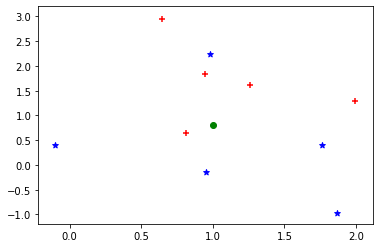

In [6]:
#点プロット(青、赤)
plt.scatter(X0[:, 0], X0[:, 1], color="b", marker="*")
plt.scatter(X1[:, 0], X1[:, 1], color="r", marker="+")

# #線引くためにグリッド作成
# xmesh, ymesh = np.meshgrid(np.linspace(xmin, xmax, 200),
#                            np.linspace(ymin, ymax, 200))
# #グリッドの点毎に値を予測
# Z = model.predict(np.c_[xmesh.ravel(), ymesh.ravel()]).reshape(xmesh.shape)

# #0になるところの線引く
# plt.contour(xmesh, ymesh, Z, levels=[0], colors="k")

#予測したい点(緑)
x_pred = np.array([[1.0, 0.8]])
plt.scatter(x_pred[:, 0], x_pred[:, 1], color="g", marker="o")
y_pred = model.predict(x_pred)
print('緑の点の予測値', y_pred)

plt.show()